# Lecture 2: Pandas

Packages I'll introduce today:
- pandas
- numpy
- pickle
- fredapi
- yfinance
- pandas_datareader

For data science-related activities, you will need Pandas and Numpy.

- Numpy is a package specialized in scientific computing, allowing you to perform efficient operations with arrays (just like MATLAB, whose name comes from Matrix Laboratory)

- Pandas contains all sorts of dataframe-related operations, so that you don't miss R or Tidyverse.

Pandas and Numpy are the bread and butter for data cleaning in R. Together with other packages, such as statsmodels for regressions, they allow you to perform your data science projects in a breeze.

#### I highly recommend working side-by-side with a cheatsheet for Pandas and Numpy in the beginning, as doing so will speed up your learning of the most common commands.

Every time you work with a package, you need to import it.

In [2]:
import pandas as pd # Pandas-owned fcns will have the pd. prefix from now on.
import numpy as np

/Users/pedrovallocci/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_1770/1190669721.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # Pandas-owned fcns will have the pd. prefix from now on.


If Pandas is not installed in your Conda, you can do the following.

** Show how to do it in the terminal for the PY files as well.

In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


## 2.1. Creating a dataframe

In Data Science, we will be wrangling data frames all the time. You can create a df from scratch using the following command:

In [4]:
d1 = pd.DataFrame({'A':[1,2,3,4],'B':[10,11,12,13]})
print(d1)

   A   B
0  1  10
1  2  11
2  3  12
3  4  13


Each column is a Pandas Series. A Pandas series is designed to work similarly to a dictionary in many ways.


In [5]:
d1['A']

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [6]:
print(type(d1['A']))

<class 'pandas.core.series.Series'>


Often, we will use pre-existing datasets. That's how we read data from a CSV file:

In [7]:
btc = pd.read_csv('BTC_USD.csv')

Similarly, there exist methods to read data from other sources, such as SQL databases, Excel files, etc.
For example, pd.read_sql() and pd.read_excel()

## 2.2. Looking at the data.

"head" gives you a glimpse on the first n (default 5) rows of data.

In [8]:
# Having a glimpse on the data
btc.head

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3480  2024-03-28  69452.773438  71546.023438  68895.507813  70744.953125   
3481  2024-03-29  70744.796875  70913.093750  69076.656250  69892.828125   
3482  2024-03-30  69893.445313  70355.492188  69601.062500  69645.304688   
3483  2024-03-31           NaN           NaN           NaN           NaN   
3484  2024-04-01  71312.171875  71312.171875  70948.109375  71143.296875   

         Adj Close        Volume  
0       457.334015  2.

In [9]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
# Checking shape of data
btc.shape

(3485, 7)

In Pandas, you can set one or more columns as the index of a DataFrame. 
This is useful when you want to locate a particular row by its index quickly, or to perform joins between two DataFrames more efficiently.

In [11]:
btc2 = btc.copy()
btc2.set_index('Date', inplace=True)
print(btc2.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0  


In [12]:
btc2['Close']['2019-01-01':'2019-01-10']

Date
2019-01-01    3843.520020
2019-01-02    3943.409424
2019-01-03    3836.741211
2019-01-04    3857.717529
2019-01-05    3845.194580
2019-01-06    4076.632568
2019-01-07    4025.248291
2019-01-08    4030.847900
2019-01-09    4035.296387
2019-01-10    3678.924561
Name: Close, dtype: float64

Before running regressions, it is useful to take a look at descriptive statistics for the data, which can hint to possibly unbalanced covariates.

In [13]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3484.000000,3484.000000,3484.000000,3484.000000,3484.000000,3.484000e+03
mean,15583.009558,15948.888058,15196.252985,15601.563773,15601.563773,1.700749e+10
std,17218.712010,17636.923366,16768.488541,17238.450545,17238.450545,1.926946e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,994.657760,1010.955002,967.731247,997.339508,997.339508,2.009653e+08
50%,8598.533692,8755.779297,8325.447265,8598.909179,8598.909179,1.267487e+10
75%,26476.076660,26800.184082,26094.678711,26487.335449,26487.335449,2.731887e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


## 2.3. Filtering data

There are several methods to filter data in Pandas. A possible way is to filter rows and columns by their indices. To do so, use `iloc`. Notice that you open *brackets*, and not parentheses, when using `iloc`. 

In [14]:
# Picking a subset of rows and columns by index:
btc.iloc[0:2, 0:2] # "iloc" stands for integer-location based indexing

,Date,Open
0,2014-09-17,465.864014
1,2014-09-18,456.859985


Even more often you'll want to query columns by name. 

In [15]:
# Picking a specific column by name:
btc['Close']

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
3480    70744.953125
3481    69892.828125
3482    69645.304688
3483             NaN
3484    71143.296875
Name: Close, Length: 3485, dtype: float64

If the name does not contain spaces, you can also use the following syntax:

In [16]:
btc.Close

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
3480    70744.953125
3481    69892.828125
3482    69645.304688
3483             NaN
3484    71143.296875
Name: Close, Length: 3485, dtype: float64

In [17]:
# Picking a subset of columns:
btc[['Close', 'Volume']]

,Close,Volume
0,457.334015,2.105680e+07
1,424.440002,3.448320e+07
2,394.795990,3.791970e+07
3,408.903992,3.686360e+07
4,398.821014,2.658010e+07
...,...,...
3480,70744.953125,3.437490e+10
3481,69892.828125,2.523085e+10
3482,69645.304688,1.713024e+10
3483,NaN,NaN


In [18]:
# Picking rows that meet a condition:
btc[btc['Close'] > 10000]

,Date,Open,High,Low,Close,Adj Close,Volume
1168,2017-11-28,9823.429688,10125.700195,9736.299805,10058.799805,10058.799805,6.348820e+09
1170,2017-11-30,9906.790039,10801.000000,9202.049805,10233.599609,10233.599609,8.310690e+09
1171,2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6.783120e+09
1172,2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5.138500e+09
1173,2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6.608310e+09
...,...,...,...,...,...,...,...
3479,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,4.082711e+10
3480,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,3.437490e+10
3481,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,2.523085e+10
3482,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,1.713024e+10


In [19]:
# Another way to query the data:
btc.query('Close > 10000')

,Date,Open,High,Low,Close,Adj Close,Volume
1168,2017-11-28,9823.429688,10125.700195,9736.299805,10058.799805,10058.799805,6.348820e+09
1170,2017-11-30,9906.790039,10801.000000,9202.049805,10233.599609,10233.599609,8.310690e+09
1171,2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6.783120e+09
1172,2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5.138500e+09
1173,2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6.608310e+09
...,...,...,...,...,...,...,...
3479,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,4.082711e+10
3480,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,3.437490e+10
3481,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,2.523085e+10
3482,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,1.713024e+10


## 2.4. Dealing with missing data

More often than not, your dataset will have some missing cells in it. Empty values will be represented with a Not-a-Number symbol (NA). How to deal with these occurrences is up to the researcher and is highly dependent on their interpretation of these NAs.

- A first approach would be to drop all rows where NA is found. Do so by using the following command:

In [20]:
# The following line will drop all rows with NaN values in the 'Close' column:
btc.dropna(subset=['Close'], inplace=True) # Choose best arguments for your case

Another possible approach is to impute values where the data is missing. To do so, you can either:
- substitute NA for a standard value (e.g. zero)
- repeat the previous or following value in the sequence
- interpolate

In [21]:
# Fill missing values:
btc.fillna(value=0)
# Replace missing values with the previous value: (f for forward, b for backward)
btc.fillna(method='ffill')
# Replace missing values with the next value:
btc.fillna(method='bfill')

/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_1770/1209507791.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc.fillna(method='ffill')
/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_1770/1209507791.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc.fillna(method='bfill')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3479,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,4.082711e+10
3480,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,3.437490e+10
3481,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,2.523085e+10
3482,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,1.713024e+10


If you decide to interpolate, the interpolation method is also a choice.

In [22]:
btc.interpolate(method='linear')

/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_1770/3073073883.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  btc.interpolate(method='linear')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3479,2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,4.082711e+10
3480,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,3.437490e+10
3481,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,2.523085e+10
3482,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,1.713024e+10


## IN-CLASS:
- Open the dataset `capital_flows.xlsx`. This database contains gross capital flows by bank corporates and sovereigns (Avdjiev, S, B Hardy, Ş Kalemli-Özcan and L Servén "Gross Capital Flows by Banks, Corporates, and Sovereigns", Journal of the European Economic Association, Vol 20 (5), pp 2098–2135.) Search the web for the right command to do that. 

**Notice that you need to pick the right worksheet to read: our desired dataset is in worksheet `data`**!

1) How many columns are there?

2) Fill all the missing data in the column `Public_PD_outflows` with 0.

3) Filter only the rows for the United States. Use any command of your choice to do so. Filter by imposing a condition on `countrycode`. 

In [23]:
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Open the dataset capital_flows.xlsx:
cf = pd.read_excel('capital_flows.xlsx', sheet_name='data')  
print(f"The dataset has {cf.shape[1]} columns.")
cf_usa = cf[cf.countrycode == 'USA']


The dataset has 40 columns.


## 2.5. Assigning new columns

Below, methods to:
- Create a new column Close2, in bracket (non-chainable) notation
- Create a new column Close3, in chainable notation
- Dropping columns from the dataset

In [ ]:
# Assigning a new column:
btc['Close2'] = btc['Close'] * 2
# Or:
# I generally prefer this way, as it's more readable.
btc = btc.assign(Close3 = btc['Close'] * 3)
# Deleting columns Close2 and Close3:
btc = btc.drop(columns=['Close2', 'Close3'])

A common task in data cleaning is to convert a string (e.g. "2014-09-02") to date format.

In [ ]:
btc2 = btc.assign(Date = pd.to_datetime(btc['Date'], errors = 'coerce'))

Another quite powerful way to manipulate data is using lambda functions:
Lambda functions are anonymous functions that can be used to perform operations on the data, 
without the need to explicitly define a function.


In [ ]:
# Using lambda functions:
btc2['Close'].apply(lambda x: x * 2)

0          914.668030
1          848.880004
2          789.591980
3          817.807984
4          797.642028
            ...      
3479    138910.687500
3480    141489.906250
3481    139785.656250
3482    139290.609376
3484    142286.593750
Name: Close, Length: 3484, dtype: float64

## 2.6. Chaining methods 

Chaining methods is a good way to make your code more readable, such as when using dplyr in R and the "%>%" operator.

Chaining also a good way to avoid creating unnecessary variables.

- You can only skip a line while chaining methods if you:

    - Wrap your whole command inside parentheses (as I did below)

    - Write "\\\\" at the end of each line.

- Below, examples of:

    - dropna: Drops rows with missing data (NA) anywhere

    - drop_duplicates: Drops rows with duplicate values

    - Lambda: this is a so-called _anonymous function_. It allows you to run functions on existing data without need to define the function outside

    - GroupBy: Useful to calculate statistics for subsets of data. Below, groupby will group subsets of rows, separated by year. The following `agg` command will find the `mean` of the Close column and the `sum` of the Volume column.

        - Several other aggregating functions exist: `count`, `median`, `max`, `std` tc.

In [90]:
btc = (btc.assign(Date = pd.to_datetime(btc['Date'], errors = 'coerce'))
            .assign(Year = lambda x: x['Date'].dt.year)
            .dropna()
            .drop_duplicates("Date"))

## 2.7. Group by
 Using groupby allows you to group data by a column and apply a function to either summarize each group as needed, or apply group-related functions (e.g. rank of variable X by group).


In [91]:
btc_summary = (btc
            .groupby('Year')
            .agg({'Close':'mean', 'Volume':'sum'}))

In [92]:
btc_summary

,Close,Volume
Year,,
2014,363.693085,2.526711e+09
2015,272.453381,1.237553e+10
2016,568.492407,3.144837e+10
2017,4006.033629,8.697464e+11
2018,7572.298947,2.213197e+12
2019,7395.246282,6.106628e+12
2020,11116.378092,1.208652e+13
2021,47436.932021,1.721185e+13
2022,28197.754099,1.095484e+13


## IN-CLASS:
- Let's use the capital flows database again. Use chaining to do the following:

1. Use `.filter` to select columns that contain the substring `PD_inflows` (Check the documentation online)

2. Fill NAs with 0 in columns Public_PD_inflows, Gov_PD_inflows, CB_PD_inflows, Bank_PD_inflows, Corp_PD_inflows.

2. Create a new column called Total_inflows equal to the sum of five columns above. Use the command `lambda` to do that.

3. For every country and every year, find the total inflows. 

In [29]:
# Open the dataset capital_flows.xlsx:
cf = pd.read_excel('capital_flows.xlsx', sheet_name='data')  
cf_agg = (cf.fillna(subset=['Public_PD_inflows', 'Gov_PD_inflows', ' CB_PD_inflows', 'Bank_PD_inflows', 'Corp_PD_inflows'],
          value = 0, inplace=True)
      .assign(Total_PD_inflows = lambda x: x['Public_PD_inflows'] + x['Gov_PD_inflows'] + x['CB_PD_inflows'] + x['Bank_PD_inflows'] + x['Corp_PD_inflows'])
      .groupby(['countrycode', 'year']).
        agg({'Total_PD_inflows':'sum'}))


TypeError: fillna() got an unexpected keyword argument 'subset'

## 2.8. Merging dataframes

Another fundamental operation for data manipulation is merging dataframes, when you have two different tables with data about your object of interest.

When merging dataframes, several merging options are available:

- inner: only keep rows that are present in both dataframes

- left: keep all rows from the left dataframe, and fill missing values with NaN

- right: keep all rows from the right dataframe, and fill missing values with NaN

- outer: keep all rows from both dataframes, and fill missing values with NaN

Additionally, you need to define what columns to merge on. 

In the example below, we will merge the closing prices of Bitcoin and Ethereum, for each given day.

In [18]:
# Let's select only columns Date, and Adj Close for the btc dataframe, for simplicity.
btc = btc[['Date', 'Close']]
btc = btc.assign(Date = pd.to_datetime(btc['Date'], errors = 'coerce'))

# Let's now load the ETH data.
eth = pd.read_csv('ETH_USD.csv')
eth = eth[['Date', 'Close']]
eth = eth.assign(Date = pd.to_datetime(eth['Date'], errors = 'coerce'))

# Merging the two dataframes:
btc_eth = pd.merge(btc, eth, how = "inner", on = 'Date', suffixes = ('_BTC', '_ETH'))
btc_eth

,Date,Close_BTC,Close_ETH
0,2017-11-09,7143.580078,320.884003
1,2017-11-10,6618.140137,299.252991
2,2017-11-11,6357.600098,314.681000
3,2017-11-12,5950.069824,307.907990
4,2017-11-13,6559.490234,316.716003
...,...,...,...
2330,2024-03-27,69455.343750,3500.115234
2331,2024-03-28,70744.953125,3561.293945
2332,2024-03-29,69892.828125,3511.806152
2333,2024-03-30,69645.304688,3507.944336


## 2.9. Saving to pickle

If you need to save your Python results for later usage, you can use the to_pickle method. 
This method saves the dataframe in a binary format that can be read by Python later on.

In [93]:
btc_eth.to_pickle('btc_eth.pkl')
    
# Loading the pickle file:
btc_eth = pd.read_pickle('btc_eth.pkl')

In [94]:
# When working with non-Pandas data, you can use the pickle module from Python's standard library.
import pickle
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
with open('data.pkl', 'wb') as f: # 'wb' stands for write-binary
    pickle.dump(data, f)
    
# Reading the pickle file:
with open('data.pkl', 'rb') as f: # 'rb' stands for read-binary
    data = pickle.load(f)

# 3. Downloading data via APIs


Very often as an economist you'll download data from the source via their API (application programming interface), rather than downloading the whole table as a CSV or a XLSX.

## 3.1. Accessing the source's API

For example, the FRED (Federal Reserve Economic Data) API provides a Python package called fredapi.

In [95]:
%pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In order to download data from FRED, you need to create a key (free of charge) in their website. You can access data as follows.

In [110]:
# Downloading data from FRED
from fredapi import Fred
fred = Fred(api_key='14894135104f5e7c7b161d94fbe9ef0f')
data = fred.get_series('SP500')
data

2014-04-09    1872.18
2014-04-10    1833.08
2014-04-11    1815.69
2014-04-14    1830.61
2014-04-15    1842.98
               ...   
2024-04-02    5205.81
2024-04-03    5211.49
2024-04-04    5147.21
2024-04-05    5204.34
2024-04-08    5202.39
Length: 2609, dtype: float64

There's also a package to access Yahoo Finance: `yfinance`

## IN-CLASS:

- Create an account at the FRED website 
- Open the FRED website and retrieve the data for "Federal Debt: Total Public Debt as Percent of Gross Domestic Product"

## 3.2. `pandas_datareader`

The maker of pandas has also authored a library called pandas_datareader that gives programmatic access to many data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important (e.g., FRED, OECD, EUROSTAT and the World Bank) are free to use.

Check full list of sources here: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [98]:
%pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/var/folders/82/qc43_tjd601__84ds5cl2fyw0000gn/T/ipykernel_3249/3031776497.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'CA'], start=2005, end=2024).stack().unstack(0)


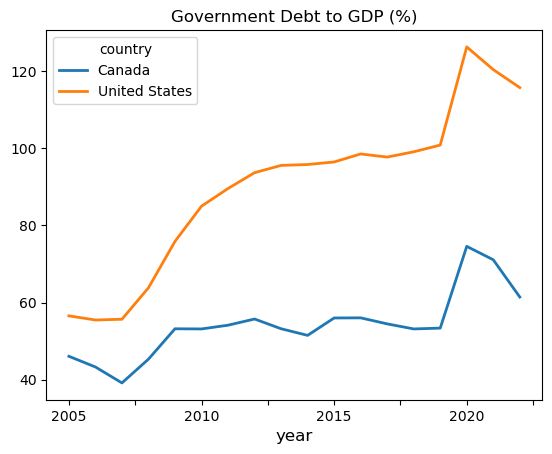

In [188]:
from pandas_datareader import wb
govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'CA'], start=2005, end=2024).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
govt_debt = govt_debt.sort_index()
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
import matplotlib.pyplot as plt
plt.title("Government Debt to GDP (%)")
plt.show()

In [46]:
# As usual, the commands shown above are not exhaustive. There are many more things you can do with pandas.
# Have the cheat sheet at hand as it can give you useful ideas: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# I recommend you to check the official documentation: https://pandas.pydata.org/pandas-docs/stable/index.html

# 4. Numpy

Numpy stands for Numerical Python. Numpy is widely used for 
scientific computing tasks because of its efficient array operations, 
mathematical functions, and capabilities for handling large datasets.
When performing complex mathematical operations with large numeric 
datasets, loops such as `for` intuitively come up as the easiest way 
to solve problems. However, this is often a sub-optimal way to create 
your code. Consider:

- Not reinventing the wheel. Check if there's a package that does what you want to do. Using the pre-packaged code is almost surely more efficient

- Converting numerical operations to their matrix forms when possible and leveraging Numpy.

## 4.1. Creating a Numpy array

In [165]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]]) 

## 4.2. Element-wise operations

`numpy` contains a thorough set of element-wise universal functions that can be used on its arrays: E.g. `abs, sqrt, exp, log, sign, ceil, floor` etc.

In [180]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [181]:
arr+arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [178]:
np.log(1+arr)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])

## 4.3. Matricial operations

The most sophisticated operations are implemented in Numpy. Below, a very short subset of Numpy's capabilities.

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [168]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Transposing

In [169]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Matrix multiplication:

In [170]:
arr @ arr.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

Eigenvalues:

In [172]:
A = np.array([[4, 1],
              [2, 3]])
eigenvalues = np.linalg.eigvals(A)
eigenvalues

array([5., 2.])

## 4.4. Pseudorandom number generation

The `numpy.random` module supplements the built-in Python `random` module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using `numpy.random.standard_normal`:

In [175]:
rng = np.random.default_rng(seed=12345)
samples = rng.standard_normal(size=(4, 4))
samples

array([[-1.42382504,  1.26372846, -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  0.6488928 ],
       [ 0.36105811, -1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317, -0.06068952]])

These random numbers are not truly random (rather, pseudorandom) but instead are generated by a configurable random number generator that determines deterministically what values are created. Functions like `numpy.random.standard_normal` use the `numpy.random` module’s default random number generator, but your code can be configured to use an explicit generator.

Python’s built-in `random` module, by contrast, samples only one value at a time. `numpy.random` is well over an order of magnitude faster for generating very large samples.